In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2


In [2]:
DATADIR = "xrays/train/"
CATEGORIES = ["covid19", "No_findings", "Pneumonia"]

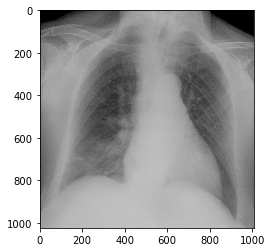

In [3]:
for cat in CATEGORIES:
    path = os.path.join(DATADIR, cat)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
        
    break

In [4]:
print(img_array)
img_array.shape

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[159 159 159]
  [158 158 158]
  [156 156 156]
  ...
  [130 130 130]
  [131 131 131]
  [132 132 132]]

 [[160 160 160]
  [159 159 159]
  [157 157 157]
  ...
  [130 130 130]
  [130 130 130]
  [131 131 131]]

 [[161 161 161]
  [160 160 160]
  [158 158 158]
  ...
  [131 131 131]
  [131 131 131]
  [132 132 132]]]


(1024, 1007, 3)

At some point we may have to determine how much resolution is necessary for X-Ray image classification. 

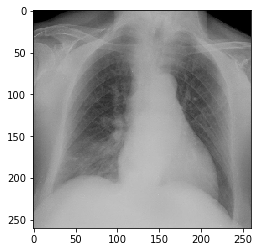

In [5]:
IMG_H = 260
IMG_W = 260

new_array = cv2.resize(img_array,(IMG_H, IMG_W))
plt.imshow(new_array)
plt.show()

In [6]:
training_data = []
def create_training_data():
    for cat in CATEGORIES:
        path = os.path.join(DATADIR,cat)
        class_num = CATEGORIES.index(cat)#0 for covid, 1 for no_finding, 2 for pneumonia
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img))
            new_array = cv2.resize(img_array,(IMG_H, IMG_W))
            training_data.append([new_array, class_num])
            
create_training_data()
        

In [25]:
print(len(training_data))

760


Therefore, this checks out as we do have 760 images in total in the train folder.

In [8]:
for sample in training_data:
    print(sample[1])

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [9]:
import random

random.shuffle(training_data)

In [10]:
for sample in training_data:
    print(sample[1])

0
2
2
0
2
1
1
0
1
0
2
1
2
2
1
1
2
1
1
1
0
2
0
2
0
1
2
0
1
1
2
2
2
1
1
1
0
2
2
2
0
2
1
1
0
1
2
0
2
2
1
1
1
2
1
0
1
1
1
2
2
1
2
0
2
2
0
1
2
0
1
1
1
0
0
1
1
2
2
1
2
2
2
2
2
1
2
0
0
1
0
1
2
2
2
1
1
0
1
1
1
0
2
1
1
2
2
2
1
2
0
2
0
1
1
0
2
1
2
1
0
2
2
1
1
1
1
1
1
0
1
2
1
1
1
2
2
1
0
1
1
0
2
1
1
2
2
2
2
2
2
2
1
1
1
2
1
0
1
2
0
2
2
2
0
1
2
0
0
1
1
2
0
1
0
0
0
0
0
1
2
0
1
1
2
2
0
1
0
2
1
2
2
0
0
0
2
0
2
2
2
2
0
2
0
0
1
1
1
2
1
2
2
1
2
0
2
0
1
2
0
2
0
1
2
0
2
2
1
2
0
1
2
0
0
1
2
0
2
0
2
2
0
2
1
2
2
0
1
2
2
1
1
2
2
0
1
2
2
1
2
1
2
2
0
0
1
1
1
2
2
1
1
1
2
2
1
2
1
1
2
0
1
2
0
1
2
1
1
2
0
2
2
2
2
0
1
0
2
2
1
2
2
1
1
1
0
1
0
1
2
0
0
2
0
2
2
2
1
0
1
1
1
0
0
2
0
1
2
0
2
2
2
0
0
1
0
0
0
1
2
2
1
2
0
0
1
2
1
2
1
0
0
2
2
1
1
1
2
0
1
1
1
0
2
0
1
2
0
2
1
0
0
1
2
2
0
2
2
1
0
0
2
2
1
1
1
2
1
2
1
1
0
1
0
0
1
2
1
2
2
2
1
0
1
2
2
2
1
1
1
2
2
2
2
1
1
2
1
0
1
0
2
1
2
0
0
2
2
1
0
2
1
2
1
1
1
1
2
1
0
1
1
1
1
2
1
1
0
2
0
1
0
1
0
1
1
1
0
1
2
2
0
2
1
1
0
2
2
2
0
2
0
0
0
0
1
0
1
0
1
1
0
0
1
2
0
0
2
0
2
1
1
1
0
1
0
2
2
2


In [44]:
X=[]
y=[]


In [45]:
for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_H, IMG_W, 3)# set this last argument to 1 for greyscale

In [46]:
X.shape

(760, 260, 260, 3)

In [47]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()



In [48]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [49]:
X.shape

(760, 260, 260, 3)

In [50]:
X.shape[1:]

(260, 260, 3)

In [51]:
import tensorflow as tf
from tensorflow.keras import layers, models

y = pickle.load(open("y.pickle", "rb"))
y = np.array(y)

#standardize scale
X = X/255.0



In [52]:
type(y)

numpy.ndarray

In [59]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)

In [61]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3,3), activation="relu", input_shape=X.shape[1:]))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(64))
model.add(layers.Dense(3, activation="softmax"))

In [63]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [67]:
model.fit(X,y,batch_size=10, epochs=10, validation_split=0.1)

Train on 684 samples, validate on 76 samples
Epoch 1/10
 50/684 [=>............................] - ETA: 1:24 - loss: 0.3356 - accuracy: 0.8750

KeyboardInterrupt: 

In [22]:
X.shape

(2280, 260, 260, 1)